<a href="https://colab.research.google.com/github/rohit-shrestha/TASK1-TSF/blob/main/TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ROHIT SHRESTHA**



# **Predicting Percentage of student based on the number of study hours.**

Propsed method : LINEAR REGRESSION 


In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for plotting graphs
%matplotlib inline 

In [20]:
#getting data from url address
#reading data
data = pd.read_csv('http://bit.ly/w-data') 
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [22]:
data.shape

(25, 2)

In [23]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


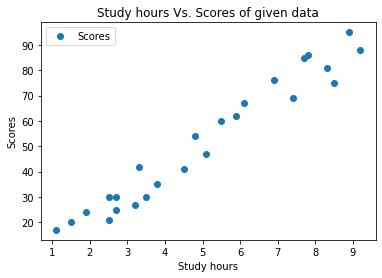

In [4]:
#Plotting data set to visualise dependency of marks on study hours
data.plot(x='Hours', y = 'Scores', style = 'o')
plt.xlabel('Study hours')
plt.ylabel('Scores')
plt.title('Study hours Vs. Scores of given data')
plt.show()

The above graph shows that the percentage obtained is almost linearly related to study hours of students, with no exceptions. 
It shows a positive linear corelation between the two.

In [32]:
#Data Prperations
#X - Study hours
#y - percentage
X = data.iloc[:,:-1].values
y = data.iloc[:, 1].values


In [11]:
#Splitting data into training and testing set using Scikit-Learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25, random_state=0 )

In [12]:
#Calling the linear regression model
from sklearn.linear_model import LinearRegression

**TRAINING MODEL**

In [24]:
#Fitting model
reg = LinearRegression()
print('...')
reg.fit(X_train,y_train)
print('Training completed')

...
Training completed


In [25]:
# obtaining the slopes and intercept for the regression line
slope = (reg.coef_)
intercept = (reg.intercept_)

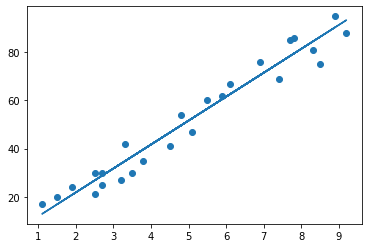

In [27]:
#Plotting the line obtained for the Linear Regression
line = slope * X + intercept
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

**PREDICTIONS ON TESTING SET**

In [18]:
predictions = regressor.predict(X_test)
# comparing the predicted values with actual values
df = pd.DataFrame({'Predicted Score':predictions, 'Actual Score':y_test})
df.head()

,Predicted Score,Actual Score
0,16.844722,20
1,33.745575,27
2,75.500624,69
3,26.786400,30
4,60.588106,62


In [19]:
print("Training score :", regressor.score(X_train, y_train))
print("Testing score :", regressor.score(X_test, y_test))

Training score : 0.9484509249326872
Testing score : 0.9367661043365056


Due to smaller data set we can observe a considerable difference in predicted and actual values

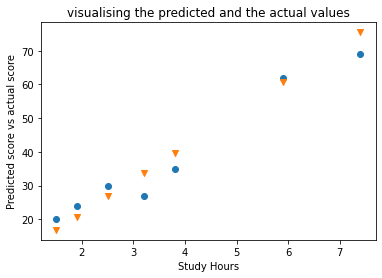

In [31]:
#visualising the predicted and the actual values
plt.scatter(X_test,y_test,marker='o')
plt.scatter(X_test,predictions,marker='v')
plt.xlabel('Study Hours')
plt.ylabel('Predicted score vs. Actual score')
plt.title('visualising the predicted and the actual values')
plt.show()

**Q: Waht is the Predicted score if a student studies 9.25 hrs/day**

In [33]:
ans = reg.predict([[9.25]])
print('Predicted score for a student studying 9.25 hrs/day :', ans[0])

Predicted score for a student studying 9.25 hrs/day : 93.89272889341652


**EVALUATING**

In [36]:
from sklearn import metrics
print('Mean squared error: ',metrics.mean_squared_error(y_test, predictions))
print('Mean absolute error: ',metrics.mean_absolute_error(y_test, predictions))

Mean squared error:  20.33292367497996
Mean absolute error:  4.130879918502482
